# Get session data description
## Notebook parameters

In [10]:
# WORKING_DIR = 
WORKING_DIRS = [
    # "../dh",
    "../beauty"
]

SHORT_NAMES = [
    # "Delivery Hero",
    "Beauty 5-core"
]

---

## 0. Imports

In [11]:
import numpy as np
from main.data.session_dataset import SessionDataset

import matplotlib.pyplot as plt


## 2. Load the Dataset Object

In [ ]:
datasets = []
for working_dir in WORKING_DIRS:
    dataset: SessionDataset = SessionDataset.from_pickle(f"{working_dir}/dataset.pickle")
    datasets.append(dataset)

## 3. Get dataset properties

In [ ]:
FIGSIZE = (10, 6)
DPI = 80
LABEL_FONT_SIZE = 17
TITLE_FONT_SIZE = 20
LEGEND_FONT_SIZE = 18
TICK_FONT_SIZE = 14



 DATASET ../beauty
Num unique items: 12101
Num sessions: 22363
Num interactions: 198502
Average length: 8.876358270357287


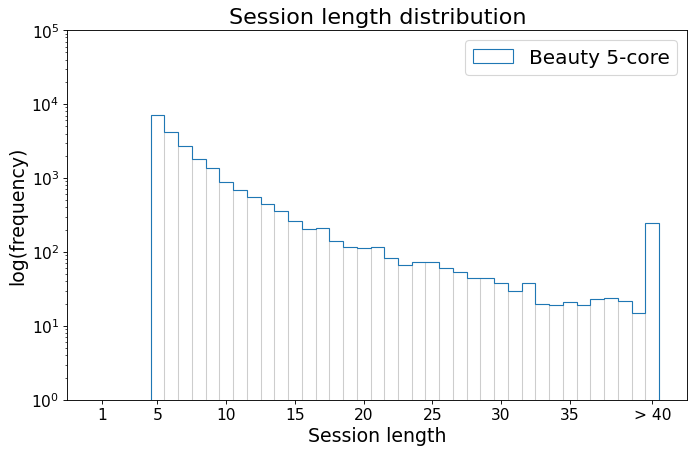

In [ ]:
def norm(data):
    data = np.array(data)
    return (data)/(max(data)-min(data))

for working_dir, dataset in zip(WORKING_DIRS, datasets):
    print(f"\n\n DATASET {working_dir}")
    print(f"Num unique items: {dataset.get_unique_item_count()}")
    print(f"Num sessions: {dataset.get_unique_sample_count()}")
    print(f"Num interactions: {dataset.get_num_interactions()}")
    print(f"Average length: {dataset.get_average_session_length()}")

    input_data = dataset.input_data
    train_data = input_data.groupby("SessionId")["ItemId"].apply(list).to_dict()

    session_lengths = sorted([len(session) for session in train_data.values()], reverse=True)
    popularities = list(input_data["ItemId"].value_counts())

# plt.xticks(np.arange(1, 21, 1)),# labels=[f"{2 * i}-{2 * i + 2}" for i in range(1, 9)])
cutoff = 40
binsize = 1
tickspace = 5
bins = np.arange(1, cutoff + binsize * 2 + 1, binsize)

from matplotlib.pyplot import figure

figure(figsize=FIGSIZE, dpi=DPI)

for working_dir, short_name, dataset in zip(WORKING_DIRS, SHORT_NAMES, datasets):
    input_data = dataset.input_data
    train_data = input_data.groupby("SessionId")["ItemId"].apply(list).to_dict()

    session_lengths = sorted([len(session) for session in train_data.values()], reverse=True)

    session_lengths_trunc = [length if length <= cutoff else cutoff + 1 for length in session_lengths]

    plt.hist(session_lengths_trunc,label=short_name, histtype=u'step', bins=bins)
    plt.hist(session_lengths_trunc, alpha=0.1, fill=False, bins=bins, color="gray")

plt.yscale("log")
# labels = [f"{i + 1}-{i + 2}" for i in np.arange(0, cutoff, tickspace)]
plt.ylim( (10**0,10**5) )

positions = []
positions.append(1)
positions.extend(np.arange(tickspace, cutoff, tickspace))
labels = positions.copy()

positions.append(cutoff + 1)
positions = [position + 0.5 for position in positions]
labels.append(f"> {cutoff}")
# positions.append(f"> {cutoff}")
plt.xticks(ticks = positions, labels=labels, fontsize=TICK_FONT_SIZE)
plt.yticks(fontsize=TICK_FONT_SIZE)

plt.legend(fontsize=LEGEND_FONT_SIZE)

# plt.xticks(np.arange(1, 21))
plt.xlabel("Session length", fontsize=LABEL_FONT_SIZE)
plt.ylabel("log(frequency)", fontsize=LABEL_FONT_SIZE)
plt.title("Session length distribution", fontsize=TITLE_FONT_SIZE)
plt.show()



/var/folders/db/mt9kjk117tv8xgp07qzfv4wh0000gn/T/ipykernel_28459/2995767228.py:17: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim( (0,10**5) )
/var/folders/db/mt9kjk117tv8xgp07qzfv4wh0000gn/T/ipykernel_28459/2995767228.py:20: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for handle in legend.legendHandles:


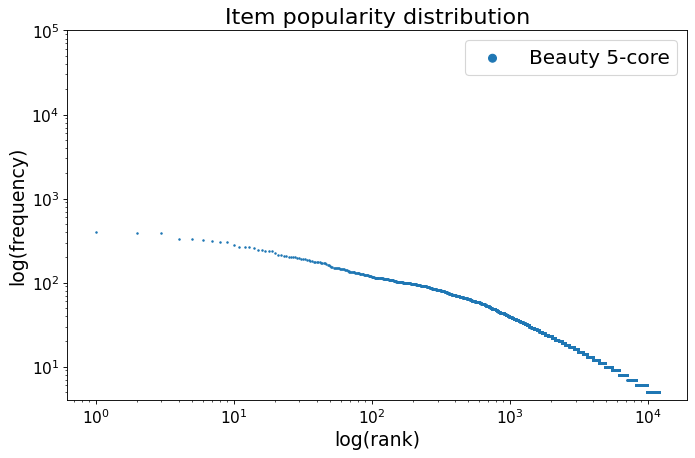

In [ ]:

figure(figsize=FIGSIZE, dpi=DPI)

for working_dir, short_name, dataset in zip(WORKING_DIRS, SHORT_NAMES, datasets):
    input_data = dataset.input_data
    train_data = input_data.groupby("SessionId")["ItemId"].apply(list).to_dict()

    popularities = list(input_data["ItemId"].value_counts())

    popularities = np.array(popularities) 

    plt.scatter(np.arange(len(popularities)), popularities, label=short_name, s=1.5)

plt.xticks(fontsize=TICK_FONT_SIZE)
plt.yticks(fontsize=TICK_FONT_SIZE)
plt.xscale("log")
plt.yscale("log")
plt.ylim( (0,10**5) )

legend = plt.legend(fontsize=LEGEND_FONT_SIZE)
for handle in legend.legendHandles: 
    handle.set_sizes([50, 0])
plt.xlabel("log(rank)", fontsize=LABEL_FONT_SIZE)
plt.ylabel("log(frequency)", fontsize=LABEL_FONT_SIZE)
plt.title("Item popularity distribution", fontsize=TITLE_FONT_SIZE)
plt.show()

In [ ]:
train_prompts = dataset.get_train_data().groupby("SessionId")["ItemId"].apply(list).to_dict()

prompt_lengths = [len(prompt) for prompt in train_prompts.values()]

import pandas as pd
prompt_lengths = np.array(prompt_lengths)
temp = pd.DataFrame(prompt_lengths)
temp.describe()

,0
count,17890.000000
mean,8.057183
std,5.785257
min,5.000000
25%,5.000000
50%,6.000000
75%,9.000000
max,99.000000
